In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
X_train = pd.read_csv("./Dataset/Training/CIC_IDS_2017_trainX.csv")
y_train = pd.read_csv("./Dataset/Training/CIC_IDS_2017_trainY.csv")

In [4]:
X_train.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,Init_Win_bytes_backward,act_data_pkt_fwd,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,443,435101,11,9,502,4076,198,0,45.636364,76.357413,...,340,4,0.0,0.0,0,0,0.0,0.0,0,0
1,80,84692281,6,8,393,11595,375,0,65.500000,151.651904,...,235,3,12021.0,0.0,12021,12021,84500000.0,0.0,84500000,84500000
2,2035,78,1,1,2,6,2,2,2.000000,0.000000,...,0,0,0.0,0.0,0,0,0.0,0.0,0,0
3,22,1467387,39,46,2568,6954,408,0,65.846154,103.092585,...,245,24,0.0,0.0,0,0,0.0,0.0,0,0
4,53,31235,2,2,74,238,37,37,37.000000,0.000000,...,-1,1,0.0,0.0,0,0,0.0,0.0,0,0


In [5]:
y_train.head()

,binary_label
0,0
1,1
2,1
3,0
4,0


In [6]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled

array([[6.75974670e-03, 3.62594136e-03, 4.55046005e-05, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.22072175e-03, 7.05769050e-01, 2.27523003e-05, ...,
        0.00000000e+00, 7.04166667e-01, 7.04166667e-01],
       [3.10521096e-02, 7.49999938e-07, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [1.22072175e-03, 6.44914946e-03, 9.10092010e-06, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [7.17174029e-04, 7.99999933e-07, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.22072175e-03, 6.75271860e-01, 3.18532204e-05, ...,
        5.56148423e-01, 5.88333333e-01, 8.44348833e-02]])

In [7]:
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_train_reshaped

array([[[6.75974670e-03],
        [3.62594136e-03],
        [4.55046005e-05],
        ...,
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00]],

       [[1.22072175e-03],
        [7.05769050e-01],
        [2.27523003e-05],
        ...,
        [0.00000000e+00],
        [7.04166667e-01],
        [7.04166667e-01]],

       [[3.10521096e-02],
        [7.49999938e-07],
        [0.00000000e+00],
        ...,
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00]],

       ...,

       [[1.22072175e-03],
        [6.44914946e-03],
        [9.10092010e-06],
        ...,
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00]],

       [[7.17174029e-04],
        [7.99999933e-07],
        [0.00000000e+00],
        ...,
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00]],

       [[1.22072175e-03],
        [6.75271860e-01],
        [3.18532204e-05],
        ...,
        [5.56148423e-01],
        [5.8833

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout

model = Sequential()

# Using a 1D convolutional layer
model.add(Conv1D(filters=64, kernel_size=5, activation='relu', input_shape=(60, 1)))

# MaxPooling to downsample --- reduce dimensionality
model.add(MaxPooling1D(pool_size=2))

# Adding another convolutional layer
model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))

# Another MaxPooling layer to downsample
model.add(MaxPooling1D(pool_size=2))

# Flattening the output to feed it to a fully connected layer
model.add(Flatten())

# Adding a dense layer
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5)) # to prevent overfitting

# Using Sigmoid in Output layer for binary classification
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 56, 64)            384       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 28, 64)           0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 26, 128)           24704     
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 13, 128)          0         
 1D)                                                             
                                                                 
 flatten (Flatten)           (None, 1664)              0         
                                                                 
 dense (Dense)               (None, 256)               4

In [9]:
import tensorflow as tf

def f1_score(y_true, y_pred):
    y_pred = tf.round(y_pred)

    tp = tf.reduce_sum(tf.cast(y_true * y_pred, 'float32'))
    fp = tf.reduce_sum(tf.cast((1 - y_true) * y_pred, 'float32'))
    fn = tf.reduce_sum(tf.cast(y_true * (1 - y_pred), 'float32'))

    precision = tp / (tp + fp + 1e-7)
    recall = tp / (tp + fn + 1e-7)

    return 2 * (precision * recall) / (precision + recall + 1e-7)

In [11]:
X_test = pd.read_csv("./Dataset/Testing/CIC_IDS_2017_testX.csv")
y_test = pd.read_csv("./Dataset/Testing/CIC_IDS_2017_testY.csv")

In [12]:
X_test.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,Init_Win_bytes_backward,act_data_pkt_fwd,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,53,85294,2,2,62,314,31,31,31.000000,0.000000,...,-1,1,0.0,0.0,0,0,0.0,0.0,0,0
1,80,1031973,3,4,26,11601,20,0,8.666667,10.263203,...,229,2,0.0,0.0,0,0,0.0,0.0,0,0
2,37457,55,1,1,0,0,0,0,0.000000,0.000000,...,379,0,0.0,0.0,0,0,0.0,0.0,0,0
3,53,203,2,2,64,96,32,32,32.000000,0.000000,...,-1,1,0.0,0.0,0,0,0.0,0.0,0,0
4,53,103416977,2,2,92,148,48,44,46.000000,2.828427,...,-1,1,30311.0,0.0,30311,30311,103000000.0,0.0,103000000,103000000


In [13]:
X_test_scaled = scaler.fit_transform(X_test)
X_test_scaled

array([[8.08740501e-04, 7.10891637e-04, 4.57337291e-06, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.22074038e-03, 8.59988298e-03, 9.14674582e-06, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [5.71565905e-01, 5.66666643e-07, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [1.22074038e-03, 7.09986887e-02, 1.37201187e-05, ...,
        0.00000000e+00, 7.09981750e-02, 7.09981750e-02],
       [8.08740501e-04, 2.22499991e-06, 4.57337291e-06, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.98672445e-02, 1.14999995e-06, 9.14674582e-06, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [14]:
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))
X_test_reshaped

array([[[8.08740501e-04],
        [7.10891637e-04],
        [4.57337291e-06],
        ...,
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00]],

       [[1.22074038e-03],
        [8.59988298e-03],
        [9.14674582e-06],
        ...,
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00]],

       [[5.71565905e-01],
        [5.66666643e-07],
        [0.00000000e+00],
        ...,
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00]],

       ...,

       [[1.22074038e-03],
        [7.09986887e-02],
        [1.37201187e-05],
        ...,
        [0.00000000e+00],
        [7.09981750e-02],
        [7.09981750e-02]],

       [[8.08740501e-04],
        [2.22499991e-06],
        [4.57337291e-06],
        ...,
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00]],

       [[4.98672445e-02],
        [1.14999995e-06],
        [9.14674582e-06],
        ...,
        [0.00000000e+00],
        [0.0000

In [15]:
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', Precision(name='precision'), Recall(name='recall'), f1_score])
history = model.fit(X_train_reshaped, y_train, batch_size=1024, epochs=40, validation_data=(X_test_reshaped, y_test), callbacks=[early_stop])

Epoch 1/40
2742/2742 [==============================] - 238s 87ms/step - loss: 0.0951 - accuracy: 0.9618 - precision: 0.9480 - recall: 0.9773 - f1_score: 0.9625 - val_loss: 0.0640 - val_accuracy: 0.9706 - val_precision: 0.8648 - val_recall: 0.9792 - val_f1_score: 0.9183
Epoch 2/40
2742/2742 [==============================] - 237s 86ms/step - loss: 0.0568 - accuracy: 0.9783 - precision: 0.9680 - recall: 0.9893 - f1_score: 0.9785 - val_loss: 0.0541 - val_accuracy: 0.9753 - val_precision: 0.8764 - val_recall: 0.9938 - val_f1_score: 0.9313
Epoch 3/40
2742/2742 [==============================] - 254s 93ms/step - loss: 0.0443 - accuracy: 0.9834 - precision: 0.9747 - recall: 0.9925 - f1_score: 0.9835 - val_loss: 0.0452 - val_accuracy: 0.9784 - val_precision: 0.8897 - val_recall: 0.9954 - val_f1_score: 0.9395
Epoch 4/40
2742/2742 [==============================] - 268s 98ms/step - loss: 0.0389 - accuracy: 0.9853 - precision: 0.9765 - recall: 0.9945 - f1_score: 0.9854 - val_loss: 0.0433 - val_a

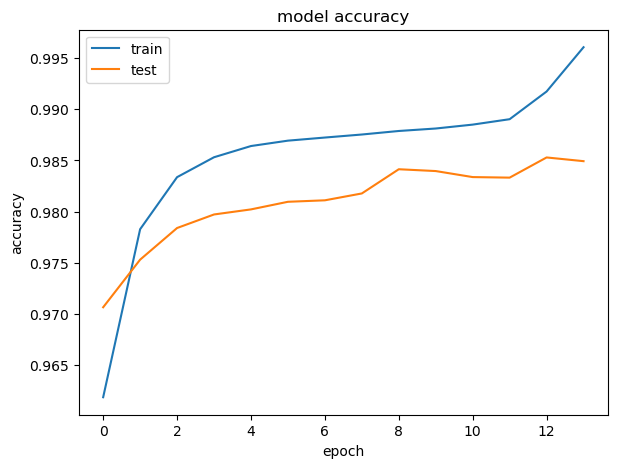

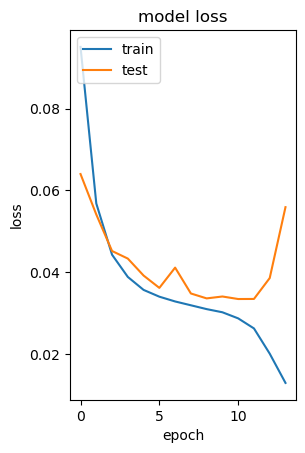

In [16]:
plt.figure(figsize=(15,5))

# History for accuracy
plt.subplot(1, 2, 1)
plt.title('model accuracy')
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# History for loss
plt.subplot(1, 2, 2)
plt.title('model loss')

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [17]:
metric_data = {
    "Accuracy": history.history['val_accuracy'],
    "Precision": history.history['val_precision'],
    "Recall": history.history['val_recall'],
    "F1_score": history.history['val_f1_score'],
}

In [18]:
df = pd.DataFrame(metric_data)
df

,Accuracy,Precision,Recall,F1_score
0,0.970641,0.864809,0.979173,0.918250
1,0.975296,0.876444,0.993777,0.931282
2,0.978392,0.889750,0.995351,0.939456
3,0.979717,0.895639,0.995906,0.942973
4,0.980213,0.898065,0.995835,0.944296
5,0.980957,0.901762,0.995678,0.946268
6,0.981101,0.902217,0.996013,0.946671
7,0.981772,0.905885,0.995457,0.948443
8,0.984140,0.920057,0.992282,0.954712
9,0.983963,0.918938,0.992567,0.954236


In [19]:
import os

folder_name = 'Metrics'
try:
    os.mkdir(folder_name)
    print(f"Directory '{folder_name}' created successfully.")
except FileExistsError:
    print(f"Directory '{folder_name}' already exists.")
except PermissionError:
    print(f"Permission denied: Unable to create '{folder_name}'.")
except Exception as e:
    print(f"An error occurred: {e}")

Directory 'Metrics' already exists.


In [20]:
df.index += 1
df

,Accuracy,Precision,Recall,F1_score
1,0.970641,0.864809,0.979173,0.918250
2,0.975296,0.876444,0.993777,0.931282
3,0.978392,0.889750,0.995351,0.939456
4,0.979717,0.895639,0.995906,0.942973
5,0.980213,0.898065,0.995835,0.944296
6,0.980957,0.901762,0.995678,0.946268
7,0.981101,0.902217,0.996013,0.946671
8,0.981772,0.905885,0.995457,0.948443
9,0.984140,0.920057,0.992282,0.954712
10,0.983963,0.918938,0.992567,0.954236


In [21]:
df.index.name = 'Epoch'
df

,Accuracy,Precision,Recall,F1_score
Epoch,,,,
1,0.970641,0.864809,0.979173,0.918250
2,0.975296,0.876444,0.993777,0.931282
3,0.978392,0.889750,0.995351,0.939456
4,0.979717,0.895639,0.995906,0.942973
5,0.980213,0.898065,0.995835,0.944296
6,0.980957,0.901762,0.995678,0.946268
7,0.981101,0.902217,0.996013,0.946671
8,0.981772,0.905885,0.995457,0.948443
9,0.984140,0.920057,0.992282,0.954712


In [22]:
df.to_csv('./Metrics/CNN_metrics_w_epoch_new.csv')

In [23]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = (model.predict(X_test_reshaped) > 0.5).astype(int)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

25996/25996 [==============================] - 53s 2ms/step
[[678237  13181]
 [   650 139796]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99    691418
           1       0.91      1.00      0.95    140446

    accuracy                           0.98    831864
   macro avg       0.96      0.99      0.97    831864
weighted avg       0.98      0.98      0.98    831864



In [24]:
folder_name = 'Models'
try:
    os.mkdir(folder_name)
    print(f"Directory '{folder_name}' created successfully.")
except FileExistsError:
    print(f"Directory '{folder_name}' already exists.")
except PermissionError:
    print(f"Permission denied: Unable to create '{folder_name}'.")
except Exception as e:
    print(f"An error occurred: {e}")

Directory 'Models' already exists.


In [25]:
model.save('./Models/Base_CNN.h5')
print("Model saved!")

Model saved!


In [26]:
model.save('./Model/Base_CNN.keras')
print("Model saved!")

Model saved!
